<h1> Day 11 - Class </h1>

## Machine Learning

- x1,x2,x3,.... are independent variables
- y is the dependent variable

We can say that y is a function of x1,x2,x3,... 

y = f(x1,x2,x3,...)

After all the preprocessing, data should be split into :
- X_train
- X_test
- y_train
- y_test

Training data will be usually 80% of the data.

### Load Titanic dataset

In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

We can take the first 80% of the rows as training data as shown below

In [3]:
x_train = df[0:int(df.shape[0] * .8)]
x_train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1,1,male,42.0,0,0,26.2875,S,First,man,True,E,Southampton,yes,True
708,1,1,female,22.0,0,0,151.5500,S,First,woman,False,NaN,Southampton,yes,True
709,1,3,male,NaN,1,1,15.2458,C,Third,man,True,NaN,Cherbourg,yes,False
710,1,1,female,24.0,0,0,49.5042,C,First,woman,False,C,Cherbourg,yes,True


The next 20% data forms the testing dataset

In [4]:
x_test =  df[int(df.shape[0] * .8) :]
x_test

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
712,1,1,male,48.0,1,0,52.0000,S,First,man,True,C,Southampton,yes,False
713,0,3,male,29.0,0,0,9.4833,S,Third,man,True,NaN,Southampton,no,True
714,0,2,male,52.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
715,0,3,male,19.0,0,0,7.6500,S,Third,man,True,F,Southampton,no,True
716,1,1,female,38.0,0,0,227.5250,C,First,woman,False,C,Cherbourg,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


If we split the training and testing data as shown above then there will be bias as it doesn't represent the characteristics of the entire data set.

We can randomnly pick 80% of the data as well

In [5]:
int(df.shape[0] * .8)

712

In [6]:
df.sample(712)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
440,1,2,female,45.0,1,1,26.2500,S,Second,woman,False,NaN,Southampton,yes,False
224,1,1,male,38.0,1,0,90.0000,S,First,man,True,C,Southampton,yes,False
555,0,1,male,62.0,0,0,26.5500,S,First,man,True,NaN,Southampton,no,True
448,1,3,female,5.0,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0,3,male,26.0,1,0,14.4542,C,Third,man,True,NaN,Cherbourg,no,False
380,1,1,female,42.0,0,0,227.5250,C,First,woman,False,NaN,Cherbourg,yes,True
455,1,3,male,29.0,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,yes,True
728,0,2,male,25.0,1,0,26.0000,S,Second,man,True,NaN,Southampton,no,False


### Sklearn train_test_split

In [9]:
from sklearn.model_selection import train_test_split
y = df['survived']
X = df.drop('survived',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(623, 14) (268, 14) (623,) (268,)


In [10]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
799,3,female,30.0,1,1,24.1500,S,Third,woman,False,NaN,Southampton,no,False
343,2,male,25.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
481,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
588,3,male,22.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
664,3,male,20.0,1,0,7.9250,S,Third,man,True,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,2,male,52.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
872,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
126,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
239,2,male,33.0,0,0,12.2750,S,Second,man,True,NaN,Southampton,no,True


In [11]:
X_test

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
84,2,female,17.00,0,0,10.5000,S,Second,woman,False,NaN,Southampton,yes,True
103,3,male,33.00,0,0,8.6542,S,Third,man,True,NaN,Southampton,no,True
316,2,female,24.00,1,0,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
424,3,male,18.00,1,1,20.2125,S,Third,man,True,NaN,Southampton,no,False
3,1,female,35.00,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,3,male,19.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
187,1,male,45.00,0,0,26.5500,S,First,man,True,NaN,Southampton,yes,True
305,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False
85,3,female,33.00,3,0,15.8500,S,Third,woman,False,NaN,Southampton,yes,False


In [12]:
y_train

799    0
343    0
481    0
588    0
664    1
      ..
714    0
872    0
126    0
239    0
388    0
Name: survived, Length: 623, dtype: int64

In [12]:
y_test

310    1
184    1
186    1
841    0
697    1
      ..
215    1
652    0
68     1
201    0
489    1
Name: survived, Length: 268, dtype: int64

### K-Fold validation

Generally results in a less biased model compare to other methods. Because it ensures that every observation from the original dataset has the chance of appearing in training and test set. This is one among the best approach if we have a limited input data. This method follows the below steps.
<img src='img/k-fold-01.png'/>
1) Split the entire data randomly into k folds (value of k shouldn’t be too small or too high, ideally we choose 5 to 10 depending on the data size). The higher value of K leads to less biased model (but large variance might lead to overfit), where as the lower value of K is similar to the train-test split approach we saw before.
2) Then fit the model using the K — 1 (K minus 1) folds and validate the model using the remaining Kth fold. Note down the scores/errors.
3) Repeat this process until every K-fold serve as the test set. Then take the average of your recorded scores. That will be the performance metric for the model.

We can write a logic manually to perform this or we can use the built in cross_val_score (returns score of each test folds)/corss_val_predict 

#### K-Fold Cross Validation

In [15]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
import pandas as pd
from sklearn import metrics

In [18]:
# Load the boston dataset
data = datasets.load_boston()
 
# extract the predictors and target data.
predictors = data.data
target = data.target

x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.2)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

cv_r2_scores_rf = cross_val_score(rf_reg, predictors, target, cv=5,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

[0.75221667 0.8565335  0.74914513 0.46008117 0.31391524]
Mean 5-Fold R Squared: 0.6263783391035703


#### Perform K-Fold Manually

In [20]:
# Load the boston dataset
data = datasets.load_boston()
 
# extract the predictors and target data.
df = pd.DataFrame(data.data)
y =  pd.DataFrame(data.target)

kf = KFold(n_splits = 5, shuffle = True)

scores = []
for i in range(5):
    result = next(kf.split(df), None)
    x_train = df.iloc[result[0]]
    x_test = df.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = rf_reg.fit(x_train,y_train)
    predictions = rf_reg.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

C:\Users\Rani\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Rani\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Rani\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Rani\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Rani\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y

Scores from each Iteration:  [0.8254921690666692, 0.839628337255363, 0.8542180657481939, 0.9289130435872781, 0.8299552311681204]
Average K-Fold Score : 0.8556413693651249


In K-Fold if all folds exhibits similar accuracies then model is performing good.

## Probability Distributions
Probability distributions are either continuous probability distributions or discrete probability distributions, depending on whether they define probabilities for continuous or discrete variables. 

For any given experiment the total data we capture is called the distribution of the data. If the probabilities of each unique value sums upto 1, we call this one as probability distribution.

The variable we study is called random variable. Random variable can take 2 kinds of values 
- Discrete
- Continous

### Discrete distribution
A discrete distribution describes the probability of occurrence of each value of a discrete random variable. A discrete random variable is a random variable that has countable values, such as a list of non-negative integers.

With a discrete probability distribution, each possible value of the discrete random variable can be associated with a non-zero probability. Thus, a discrete probability distribution is often presented in tabular form. 

For a discrete variable it is called, <b>probability mass function</b>

The probability mass function is the function which describes the probability associated with the random variable x. This function is named P(x) or P(x=x) to avoid confusion. P(x=x) corresponds to the probability that the random variable x take the value x (note the different typefaces).
<b>Example of a rolling dice</b>
Let’s roll a die an infinite number of times and look at the proportion of 1, the proportion of 2 and so on. We call x the random variable that corresponds to the outcome of the dice roll. Thus the random variable x can only take the following discrete values: 1, 2, 3, 4, 5 or 6. It is thus a discrete random variable.

The aim of the probability mass function is to describe the probability of each possible value. In our example, it describes the probability to get a 1, the probability to get a 2 and so on. In the case of a dice rolling experiment, we have the same probability to get each value (if we assume that the die is perfect). This means that we can write:

P(x=1) = P(x=2) = P(x=3) = P(x=4) = P(x=5) = P(x=6) = 1/6

By the way, this distribution shows the same probability for each value: it is called the <b>uniform distribution</b>. If all the outcomes shows different probabilities then we call it as <b>multinomial distribution</b>

<b>Example of the number of customer complaints</b>
With a discrete distribution, unlike with a continuous distribution, you can calculate the probability that X is exactly equal to some value. For example, you can use the discrete Poisson distribution to describe the number of customer complaints within a day. Suppose the average number of complaints per day is 10 and you want to know the probability of receiving 5, 10, and 15 customer complaints in a day. 
<pre>
x 	P (X = x)
5 	0.037833
10 	0.125110
15 	0.034718
</pre>

You can also view a discrete distribution on a distribution plot to see the probabilities between ranges. 
<img src='img/dist-prob-01.png' />
The shaded bars in this example represents the number of occurrences when the daily customer complaints is 15 or more. The height of the bars sums to 0.08346; therefore, the probability that the number of calls per day is 15 or more is 8.35%. 

#### Properties of a probability mass function
 A function is a probability mass function if:
<img src='img/pmf-01.gif' />
The symbol ∀ means “for any”. This means that for every possible value x in the range of x (in the example of a die rolling experiment, all possible values were 1, 2, 3, 4, 5 and 6), the probability that the outcome corresponds to this value is between 0 and 1. A probability of 0 means that the event is impossible and a probability of 1 means that you can be sure that the outcome will correspond to this value.

In the example of the dice, the probability of each possible value is 16 which is between 0 and 1. This property is fulfilled.
<img src='img/pmf-02.gif' />
This means that the sum of the probabilities associated with each possible value is equal to 1.

#### Bernoulli distribution
The Bernoulli distribution is a discrete distribution having two possible outcomes labelled by and in which ("success") occurs with probability and ("failure") occurs with probability , where . It therefore has probability density function.

### Continuous distribution
A continuous distribution describes the probabilities of the possible values of a continuous random variable. A continuous random variable is a random variable with a set of possible values (known as the range) that is infinite and uncountable.

Probabilities of continuous random variables (X) are defined as the area under the curve of its PDF. Thus, only ranges of values can have a nonzero probability. The probability that a continuous random variable equals some value is always zero. 

For a continuous distribution we call it as <b>probability density function</b>

In the case of the probability mass function, we saw that the y-axis gives a probability.

However, we can’t do this for continuous variables because the total number of possibilities is infinite. For instance, if we draw a number between 0 and 1, we have an infinite number of possible outcomes (for instance 0.320502304…)

For that reason, the y-axis of the probability density function doesn’t represent probability values. To get the probability, we need to calculate the area under the curve (we will see below some details about the area under the curve). The advantage is that it leads to the probabilities according to a certain range (on the x-axis): the area under the curve increases if the range increases.

<b>Example of the distribution of weights</b>

The continuous normal distribution can describe the distribution of weight of adult males. For example, you can calculate the probability that a man weighs between 160 and 170 pounds. 

<img src='img/cont-prob-01.png' />
The shaded region under the curve in this example represents the range from 160 and 170 pounds. The area of this range is 0.136; therefore, the probability that a randomly selected man weighs between 160 and 170 pounds is 13.6%. The entire area under the curve equals 1.0. 

However, the probability that X is exactly equal to some value is always zero because the area under the curve at a single point, which has no width, is zero. For example, the probability that a man weighs exactly 190 pounds to infinite precision is zero. You could calculate a nonzero probability that a man weighs more than 190 pounds, or less than 190 pounds, or between 189.9 and 190.1 pounds, but the probability that he weighs exactly 190 pounds is zero.

#### Properties of the probability density function
 These differences between the probability mass functions and the probability density function lead to different properties for the probability density function:
<img src='img/pdf-01.gif' />
In this case, p(x) is not necessarily less than 1 because it doesn’t correspond to the probability (the probability itself will still need to be between 0 and 1). We find probability by calculating the area under the curve. 

For instance, let’s say that we have a continuous random variable that can take values between 0 and 0.5. This variable is described by a uniform distribution so we will have the following probability distribution function:
<img src='img/pdf-02.png' />
We can see that the y-values are greater than 1. The probability is given by the area under the curve and thus it depends on the x-axis as well.

If you are like to see this by yourself, we will reproduce this example in Python. To do that we will create a random variable x that can take a value between 0 and 0.5 randomly. The uniform distribution will be used thanks to the Numpy function random.uniform(). The parameters of this function are the lowest value (included), the highest value (not included) and the number of samples. So np.random.uniform(0, 0.5, 10000) will create 10000 value randomly chosen to be ≥0 and <0.5.

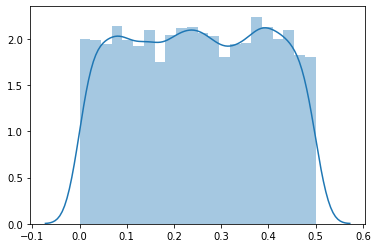

In [23]:
import matplotlib.pyplot as plt
x = np.random.uniform(0, 0.5, 10000)

sns.distplot(x)
plt.show()

We can see that the shape looks like what I draw above with y-axis values around 2 for all x between 0 and 0.5.

However, one thing can be intriguing in this plot. We talked about continuous variable and here we have represented the distribution with bars. The explanation is the same as before: we need to discretise the function to count the number of outcomes in each interval. Actually, the number of intervals is a parameter of the function distplot(). Let’s try to use a lot of bins:

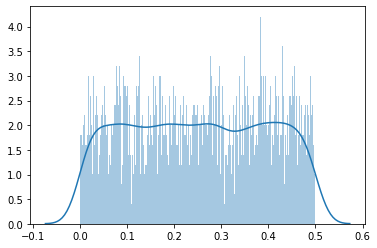

In [24]:
x = np.random.uniform(0, 0.5, 10000)

sns.distplot(x, bins=1000)
plt.show()

We can see that we are still around 2 but that the variability is greater than before (the bars can go from 1 to 4 which was not the case in the last plot). Any idea why?

This is because since we took more bins, a smaller number of values were in each bin leading to a less accurate estimate. If this hypothesis is true, we could reduce this variability by increasing the number of samples. Let’s try that:

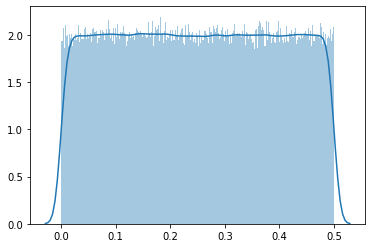

In [25]:
x = np.random.uniform(0, 0.5, 1000000)

sns.distplot(x, bins=1000)
plt.show()

That’s great

We can now go to the second property!

<img src='img/pdf-03.gif'/>

For the probability mass function, we have seen that the sum of the probabilities has to be equal to 1. This is not the case for the probability density functions since the probability corresponds to the area under the curve and not directly to y values. However, this means that the area under the curve has to be equal to 1.

We saw in the last example, that the area was actually equal to 1. It can be easily obtained and visualised because of the squared shape of the uniform distribution. It is thus possible to multiply the height by the width: 2×0.5=1.

However, in many cases, the shape is not a square and we still need to calculate the area under the curve. Let’s see how to do this!

#### Recap of Integration & Differentiation

Area under the curve

The area under the curve of a function for a specific range of values can be calculated with the integral of the function. We will see that calculating the integral of a function is the opposite of calculating the derivative. This means that if you derive a function f(x) and calculate the integral of the resulting function f′(x) you will get back f(x).

The derivative at a point of a function gives its rate of change. What is the link between the function describing the rate of change of another function (the derivative) and the area under the curve ?

Let’s start with a point on derivative! And then, with the next graphical example, it will be crystal clear. 
 
Example 6.
 
We want to modelise the speed of a vehicle. Let’s say that the function f(x)=x^2

define its speed (y-axis) in function of time (x-axis).

First, we will plot the function f(x)=x^2 to see its shape:

(-4, 4)

(-1, 10)

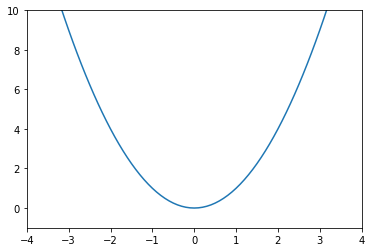

In [27]:
x = np.arange(-10, 11, 0.1)
fx = x ** 2

plt.plot(x, fx)
plt.xlim(-4, 4)
plt.ylim(-1, 10)

The shape is a parabola! It shows that the speed increases slowly at the beginning but increases more and more for a constant duration. In our example, the function defines the speed of the vehicle in function of time so it doesn’t make sense to have negative values. Let’s take only the positive part of the x-axis to avoid negative time (we’ll say that 0 is the start of the experiment).

(-1, 4)

(-1, 10)

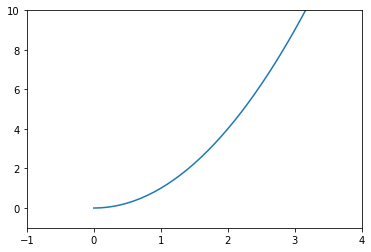

In [28]:
x = np.arange(0, 11, 0.1)
fx = x ** 2

plt.plot(x, fx)
plt.xlim(-1, 4)
plt.ylim(-1, 10)

Ok, that’s better!

The derivative of this function is f′(x)=2x. 

Here is a plot of f′(x):

(0, 10)

(0, 10)

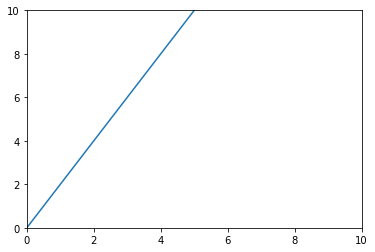

In [29]:
x = np.arange(-10, 11)
fx = 2 * x

plt.plot(x, fx)
plt.xlim(0, 10)
plt.ylim(0, 10)

Derivative

 
This representation of the derivative shows the acceleration. f(x) described the speed of the vehicle in function of time and the derivative f′(x) shows the rate of change of the speed in function of time, that is the acceleration.

We can see that the acceleration of the vehicle increases linearly with time. The derivative tells us that the rate of change of the vehicle speed is 2x. For instance, when x=0, the rate of change is equal to 2×0=0, so the speed is not changing. When x=3, the rate of change is 2×3=6. This means that at this point, the speed is increased by 6 when time is increased by 1. To summarise, the derivative of a function gives its rate of change. In our example, the rate of change was another function (f′(x)=2x) but it can be a constant (the rate of change is always the same, e.g. f′(x)=2) or a quadratic function for instance (e.g. f′(x)=x3).

Integrals
 
Being able to calculate derivatives is very powerful but is it possible to do the reverse: going from the rate of change to the change itself . Whoah, this is cool! The answer is given by the integral of a function.

The integral of f′(x) gives us f(x) back. The notation is the following:

<img src='img/int-01.gif'/>

This means that we take f′(x) to get back f(x). The notation dx here means that we integrate over x, that is to say, that we sum slices weighted by y.

If we take again the last example we have:

<img src='img/int-02.gif'/>

We can see that there is a difference: the addition of a constant c. This is because an infinite number of function could have given the derivative 2x (for instance x2+1 or x2+294…). We lose a bit of information and we can’t recover it.

And now, the graphical explanation: we have seen that 2x is the function describing the rate of change (the slope) of the function x2. Now if we go from f′(x) to f(x) we can see that the area under the curve of f′(x) correspond to f(x):

<img src='img/int-03.png'/>

This plot shows the function f′(x)=2x and we can see that the area under the curve increases exponentially. This area is represented for different ranges ([0-0], [0-1], [0-2], [0-3]). We can calculate the area under the curve (using the Pythagorean theorem and dividing by 2 since the areas are half squares) and find the following values: 0, 1, 4, 9… This corresponds to the original function f(x)=x2!

#### Uniform continous distribution
E.g. probability of having temparature b/w 30-33 is same as 34-37 and so on

### Titanic Dataset

In [2]:
df = sns.load_dataset('titanic')
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [32]:
## gives the probability distribution of data
df['pclass'].value_counts(normalize=True) 

3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64

#### Cumulative Mass Function
For pclass, if we sum the values cumulative, then we get cumulative mass function
<pre>
3    0.551066
1    0.551066 + 0.242424
2    0.551066 + 0.242424 + 0.206510
</pre>

If we plot this with x-axis as pclass and y axis as the cumulative sum, then it's called the cumulative mass function.

#### Cumulative Density Function
Likewise we have cumulative density function too

In [34]:
## gives the probability distribution of data.. go for ranges in such cases
df['age'].value_counts(normalize=True) 

24.00    0.042017
22.00    0.037815
18.00    0.036415
19.00    0.035014
30.00    0.035014
           ...   
55.50    0.001401
70.50    0.001401
66.00    0.001401
23.50    0.001401
0.42     0.001401
Name: age, Length: 88, dtype: float64

In [35]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

## Imbalanced Dataset
Biased dataset is called imbalanced dataset. If you check the survived field,
- 549 records are of 0
- 342 records are of 1

We can address this in 3 ways,
- under sampling
- over sampling
- SMOTE

### Under sampling
Undersampling techniques remove examples from the training dataset that belong to the majority class in order to better balance the class distribution, such as reducing the skew from a 1:100 to a 1:10, 1:2, or even a 1:1 class distribution. This is different from oversampling that involves adding examples to the minority class in an effort to reduce the skew in the class distribution. 

Undersampling methods can be used directly on a training dataset that can then, in turn, be used to fit a machine learning model. Typically, undersampling methods are used in conjunction with an oversampling technique for the minority class, and this combination often results in better performance than using oversampling or undersampling alone on the training dataset.

The simplest undersampling technique involves randomly selecting examples from the majority class and deleting them from the training dataset. This is referred to as random undersampling. Although simple and effective, a limitation of this technique is that examples are removed without any concern for how useful or important they might be in determining the decision boundary between the classes. This means it is possible, or even likely, that useful information will be deleted.

In [35]:
df1 = df[df['survived'] == 1]
print('Survived shape',df1.shape)
# Only take as many samples of survived = 0 as many are there in df1
df2 = df[df['survived'] != 1].sample(df1.shape[0])
print('After under sampling non survived shape',df2.shape)

df3 = df1.append(df2)
df3.shape

df3['survived'].value_counts()

Survived shape (342, 15)
After under sampling non survived shape (342, 15)


(684, 15)

1    342
0    342
Name: survived, dtype: int64

#### TomekLinks
It is a rule that finds pairs of examples, one from each class; they together have the smallest Euclidean distance to each other in feature space.

This means that in a binary classification problem with classes 0 and 1, a pair would have an example from each class and would be closest neighbors across the dataset. These cross-class pairs are now generally referred to as “Tomek Links” and are valuable as they define the class boundary. The procedure for finding Tomek Links can be used to locate all cross-class nearest neighbors. If the examples in the minority class are held constant, the procedure can be used to find all of those examples in the majority class that are closest to the minority class, then removed. These would be the ambiguous examples.

Imbalanced Dataset

Counter({0: 9900, 1: 100})


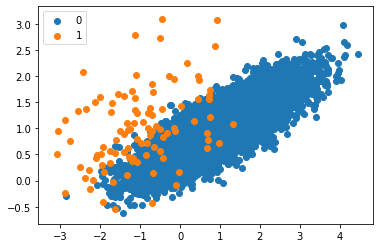

In [11]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Undersampling using TomekLinks

Counter({0: 9900, 1: 100})
Counter({0: 9874, 1: 100})


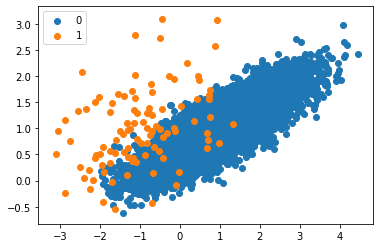

In [12]:
# Undersample and plot imbalanced dataset with Tomek Links
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = TomekLinks()
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### Over sampling
Undersampling results in losing data. With over sampling we can duplicate the data

In [38]:
df2 = df[df['survived'] != 1]
df1 = df[df['survived'] == 1].sample(df2.shape[0],replace=True)

df2.shape
df1.shape

(549, 15)

(549, 15)

### SMOTE

SMOTE is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short. An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space. This procedure can be used to create as many synthetic examples for the minority class as are required.

It is suggested to first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution. The combination of SMOTE and under-sampling performs better than plain under-sampling. A general downside of the approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.

In [40]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import imblearn
print(imblearn.__version__)

0.6.1


In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns

df1 = df[df.describe().columns]
df1.fillna(20,inplace=True)

y = df1['survived']
x = df1.drop('survived',axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE()
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Number transactions X_train dataset:  (623, 5)
Number transactions y_train dataset:  (623,)
Number transactions X_test dataset:  (268, 5)
Number transactions y_test dataset:  (268,)
Before OverSampling, counts of label '1': 242
Before OverSampling, counts of label '0': 381 

After OverSampling, the shape of train_X: (762, 5)
After OverSampling, the shape of train_y: (762,) 

After OverSampling, counts of label '1': 381
After OverSampling, counts of label '0': 381


C:\Users\Rani\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [37]:
sum(y_train_res==1)
sum(y_train_res==0)
True + True + True
False + False
True + False

381

381

3

0

1

NameError: name 'imblearn' is not defined

Counter({0: 9900, 1: 100})


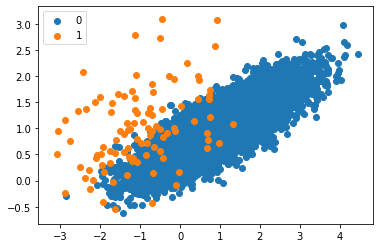

In [6]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Next, we can oversample the minority class using SMOTE and plot the transformed dataset.

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


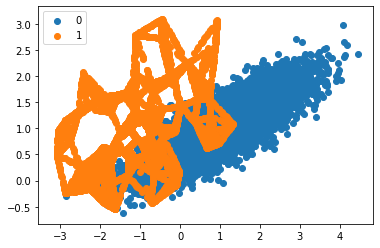

In [7]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

We can update the example to first oversample the minority class to have 10 percent the number of examples of the majority class (e.g. about 1,000), then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (e.g. about 2,000).

To implement this, we can specify the desired ratios as arguments to the SMOTE and RandomUnderSampler classes; for example:

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


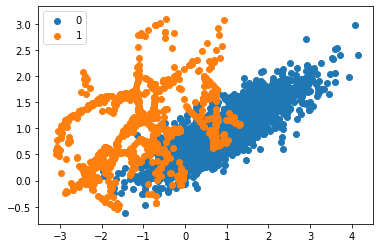

In [8]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### SMOTE With Selective Synthetic Sample Generation

We can be selective about the examples in the minority class that are oversampled using SMOTE.

In this section, we will review some extensions to SMOTE that are more selective regarding the examples from the minority class that provide the basis for generating new synthetic examples.

#### Borderline-SMOTE
A popular extension to SMOTE involves selecting those instances of the minority class that are misclassified, such as with a k-nearest neighbor classification model.

We can then oversample just those difficult instances, providing more resolution only where it may be required. These examples that are misclassified are likely ambiguous and in a region of the edge or border of decision boundary where class membership may overlap. 

There is a version of the method that oversampled the majority class for those examples that cause a misclassification of borderline instances in the minority class. This is referred to as <b>Borderline-SMOTE1</b>, whereas the oversampling of just the borderline cases in minority class is referred to as <b>Borderline-SMOTE2</b>.

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


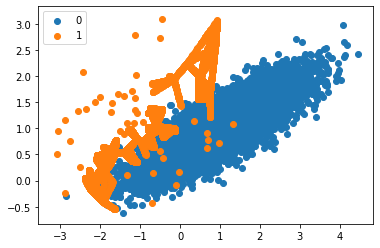

In [9]:
# borderline-SMOTE for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

The plot clearly shows the effect of the selective approach to oversampling. Examples along the decision boundary of the minority class are oversampled intently (orange).

The plot shows that those examples far from the decision boundary are not oversampled. This includes both examples that are easier to classify (those orange points toward the top left of the plot) and those that are overwhelmingly difficult to classify given the strong class overlap (those orange points toward the bottom right of the plot).

#### Adaptive Synthetic Sampling (ADASYN)
Another approach involves generating synthetic samples inversely proportional to the density of the examples in the minority class.

That is, generate more synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.

This modification to SMOTE is referred to as the Adaptive Synthetic Sampling Method, or ADASYN, 

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9899})


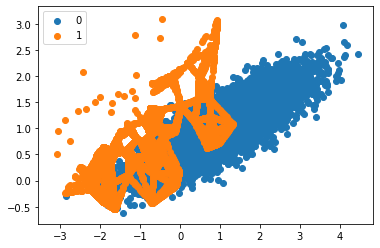

In [10]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Like Borderline-SMOTE, we can see that synthetic sample generation is focused around the decision boundary as this region has the lowest density.
 
Unlike Borderline-SMOTE, we can see that the examples that have the most class overlap have the most focus. On problems where these low density examples might be outliers, the ADASYN approach may put too much attention on these areas of the feature space, which may result in worse model performance.

It may help to remove outliers prior to applying the oversampling procedure, and this might be a helpful heuristic to use more generally.

## References

https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/
    
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/